# **Implement** a Du Bois Bar Graph with Stata:

## Black Literacy After Emancipation

<div>
<img src="https://github.com/HigherEdData/Du-Bois-STEM/blob/main/readings-images/original-plate-47.jpg?raw=true" width="700" />
</div>

### This exercise is inspired by the annual #DuBoisChallenge

The #DuBoisChallenge is a call to scientists, students, and community members to recreate, adapt, and share on social media the data visualzations created by W.E.B. Du Bois and his collaborators in 1900. Before doing the interactive exercise, please read this article about the Du Bois Challenge: https://nightingaledvs.com/the-dubois-challenge/

### In this interactive excercise, you will:

1. Learn how to create a variation of a **bar graph.**
2. Learn and modify code in the statistical programming lanugage **Stata**.
3. Learn how to write statistical code to:
    * create visualizations that consistently and accurately represent your data
    * create a transparent record of exactly how you visualized something
    * make it easy for you or others to recreate or modify your visualization
4. Your instructor may also ask you answer questions and submit screenshots as you go in a parallel **Catcourses** (or other Canvas system) as you go. 

### You will learn how to use the *Stata* statistical programming language by creating two graphs:

1. You will recreate Du Bois' visualization of Black illiteracy rates in the US compared to illiteracy rates in other countries. Du Bois created the visualization in 1900.

2. You will reproduce Du Bois' visualization using data on Black illiteracy in the US today. This aligns with how Du Bois saw mass education as one important strategy for furthering and deepining emancipation for Black Americans and others.

3. An important context of Du Bois's graph of Black illiteracy is that literacy was illegal for enslaved people in the U.S. until emancipation and the Confederacy's defeat during the Civil War.  illiteracy then declined rapidly as Black Americans sought to empower themselves through education. Du Bois plotted this decline in illiteracty with the following graph:

<div>
<img src="https://github.com/ajstarks/dubois-data-portraits/blob/master/plate14/original-plate-14.jpg?raw=true" width="700" />
</div>

### 1. How to use this **Jupyter Notebook**

For most Stata users, the easiest way to engage with this Notebook is by copying and pasting code from code cells below into your Stata command line or a Stata .do file.

If you have access to both Jupyter and a Stata license, you can also download this Jupyter Notebook to use it interactively on your own computer. You find a step-by-step guide for installing the StataNB kernel to run the notebook **[here](https://github.com/charlieeatonphd/Graduate-Statistics-and-Data-Science-for-Sociology/blob/master/week1/w1lesson1_jupyter_setup.ipynb)**.

Grey cells in the *Notebook* like the one below are **code cells** that will provide code for you to copy, paste, and edit with Stata.

In [2]:
%%set graph_height = 7
graph_width = 5.5

graph size was (5.5in, 4in), is now (5.5, 7).


### 2. Getting hints and answers.

When we use code, we often separate different parts of the code's instructions to the computer using parentheses, commas, and quotation marks. This is called syntax.

When we have multiple lines of code that need to work together in stata, we place three backslashes ```///``` at the end of each line to tell Stata the code continues on the next line.

Every open parenthese and quotation mark needs to be closed. And all of these pieces need to be just right. When it's not, the code won't work and that can be frustrating.

We'll try to give clear instructions so you can get the code right yourself. But chatGPT is a powerful tool for fixing little syntax problems. At any time, you can copy and paster your code into chatGPT and ask, **why is this code not working?**. Or, **how can I fix this code so it runs?** chatGPT is good for this kind of code debugging.

### 3. Reading and writing comments that explain your code

In a Stata .do file you can write **comment** text that explains our code. We put a ```// ``` before **comment** text to tell Stata that the text is not code it should execute. Any text after a ```// ``` on a given line will be treated as a comment. To see how this works, try the following below:

1. Try to run the code below. You should get an error message because the comment text ```This is code that adds 2+2``` is not Stata code and doesn't have a ```// ``` sign in front of it.
2. Add a ```// ``` sign before ```This is code that adds 2+2``` and try to run the code again in your .do file.

In [ ]:
This is code that adds 2+2

display 2+2 // the result of 2 +2 should be 4

### 4. Importing Du Bois' data into Stata

The first step for data visualization in **Stata** is to **import** your data. This is like double clicking a file to open it in other computer programs. But with **Stata**, we use code.

We are also going to import a special Du Bois **Stata scheme** that adds graph settings that automates setting background colors and other graph choices to look like Du Bois' graph.

For this exercise, we're going to import the scheme from a ***SSC** (social science computing) website. Then we'll import the Du Bois data from a website. In this case, the data is in a .csv (comma separated value) file.

The **Stata** code to import the Du Bois scheme from SSC is ```ssc install dubois```. 

The **Stata** code to import the data file is ```import delimited "web_address_with_data/data_file_name.csv", clear```

The ```delimited``` word in the code tells stata that the file is comma separated. At the end of the web location and file name, there is a comma. After that comma we can add "specifications" to the command. Here, the only extra specification is ```clear``` which tells Stata to clear any data it has already loaded and replace it with the data from the import command. 

To do this yourself, replace the ```____``` portion of the code below to add the ```import``` command.

Then, to confirm the data has imported, write the ```list``` command to list all the data loaded in stata.

Then run these three lines of code in you .do file.

In [3]:
ssc install dubois

________ delimited "https://raw.githubusercontent.com/HigherEdData/Du-Bois-STEM/refs/heads/main/data/d_literacy_country.csv", clear

list

checking dubois consistency and verifying not already installed...
all files already exist and are up to date.
(encoding automatically selected: ISO-8859-1)
(2 vars, 10 obs)

     +----------------------------+
     |         country   illite~y |
     |----------------------------|
  1. |        Roumanie    72.9363 |
  2. |          Servie    72.2908 |
  3. |          Russie    72.2908 |
  4. | Negroes, U.S.A.       56.8 |
  5. |         Hongrie     55.509 |
     |----------------------------|
  6. |          Italie    43.8909 |
  7. |        Autriche    34.8545 |
  8. |         Ireland    25.1727 |
  9. |          France    12.9091 |
 10. |           Suede    .645454 |
     +----------------------------+


### 5. Creating a Bar Graph

After successfully listing the data above, you should be able to see that it has data in two columns. Each column is a **variable**:
* **country** is a country name for 10 countries with Black people in the U.S. treated as a country.
* **illiteracy** containts percent of people in each country who are illiterate.

As a first step, we will create a **bar graph** of the data using the shortest code possible. The code will:

1. repeat the code below that we wrote above to **import** the Du Bois illiteracy data.

2. Add a ```graph hbar``` command. ```hbar``` is short for ***horizontol bar***. After hbar we:
* include (```asis```) in parentheses to tell Stata we want to graph each data point as it is listed in the dataset, rather than first computing its mean or some statistic from multiple data points per country.
* list the bar value variable that determines the length of each bar.
* following a comma, specify the category variable for the categories of each bar. We do this by writing the category variable name in parentheses after the specification like this: ```over(categoryvariablename)```

After looking at Du Bois' version of the graph above, replace the ```_____``` characters in the code cell below to plot the correct variable as the bar value variable and the correct variable as the category variable. Then run the code in your Stata Notebook

checking dubois consistency and verifying not already installed...
all files already exist and are up to date.
(encoding automatically selected: ISO-8859-1)
(2 vars, 10 obs)


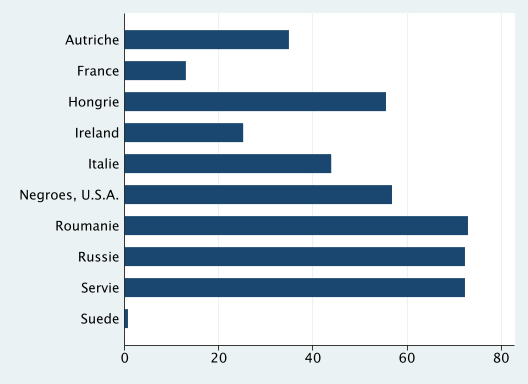

In [1]:
ssc install dubois
import delimited "https://raw.githubusercontent.com/HigherEdData/Du-Bois-STEM/refs/heads/main/data/d_literacy_country.csv", clear

graph hbar (asis) _______, ///
    over(_________)

### 6. Changing the background color and aspect ratio

We can add some of the general Du Bois graphing style elements just by adding the **Du Bois Scheme** to the graph code.

For example, we can change the background color and the aspect ratio (ratio of graph width to graph height) this way.

To add the Du Bois scheme, we add the ```scheme(dubois)``` specification at the end of the comma. Fill in the blank in the code below to do this. Then run it in you .do file.

checking dubois consistency and verifying not already installed...
all files already exist and are up to date.
(encoding automatically selected: ISO-8859-1)
(2 vars, 10 obs)


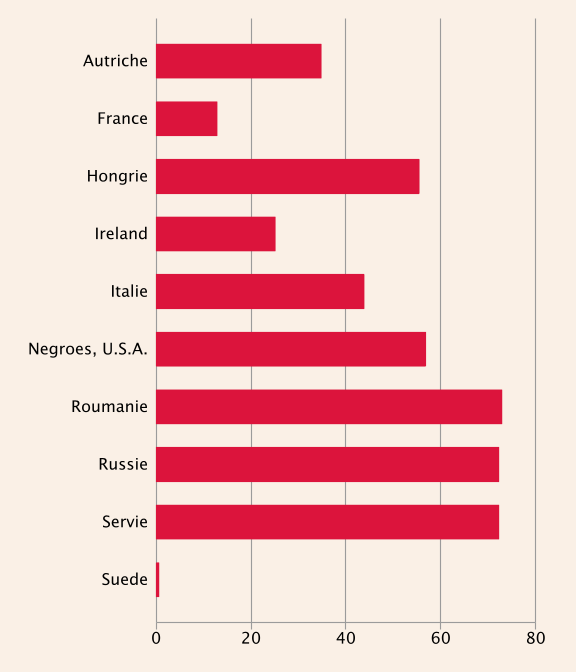

In [4]:
ssc install dubois
import delimited "https://raw.githubusercontent.com/HigherEdData/Du-Bois-STEM/refs/heads/main/data/d_literacy_country.csv", clear

graph hbar (asis) illiteracy, ///
    over(country) ///
    scheme(_______)

### 6. Ordering the Bars and Making the Bar for Black Americans a Different Color

In the bar graph you created above, can you tell what order the bars for each country are sorted by?

Du Bois sorts the bar for each country by its illiteracy rate from highest to lowest. To do this in stata, we need to generate an negative illiteracy variable to sort bars in descending order (the most negative illiteracy rate is the smallest value, which will then sort from lowest to highest). This is done by the ```gen illiteracy_neg = -illiteracy ``` code below.

To graph the Black U.S. bar in a different color, we also need to create separate illiteracy variables for Blacks in the U.S. and for all other countries. This is done by the ```separate illiteracy,  by(country=="Negroes, U.S.A.")``` code below.

Fill in the blanks below to graph bars for the two separate illiteracy variables and sort bars in descending order with illiteracy_neg.

checking dubois consistency and verifying not already installed...
all files already exist and are up to date.
(encoding automatically selected: ISO-8859-1)
(2 vars, 10 obs)

Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
illiteracy0     float   %9.0g                 illiteracy, !(country=="Negroes,
                                                U.S.A.")
illiteracy1     float   %9.0g                 illiteracy, country=="Negroes,
                                                U.S.A."


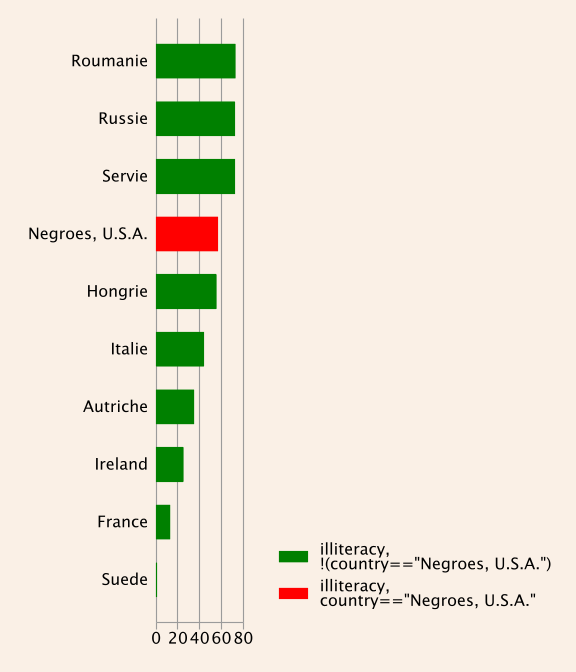

In [14]:
ssc install dubois
import delimited "https://raw.githubusercontent.com/HigherEdData/Du-Bois-STEM/refs/heads/main/data/d_literacy_country.csv", clear

// below generatees a Negative illiteracy value for descending sort
gen illiteracy_neg = -illiteracy 
// below creates separate illiteracy variables to graph, illiteracy1 for Black U.S. illiteracy0 for others
separate illiteracy,  by(country=="Negroes, U.S.A.")

// fill in the blanks below with the new illiteracy1 variable name
graph hbar (asis) illiteracy0 illiteracy__, ///
    over(country, sort(________))  /// fill in the blank here to add the illiteracy_neg sorting variable
    scheme(dubois) ///
    bar(1, color(green)) ///
    bar(2, color(red)) ///
    nofill // nofill tells Stata to not have a line break between different variables bars

### 9. Turn the legend off grid lines off. Make the Country label text smaller.

The country label text is now a bit large. So we add the following label text size code ```label(labsize(1.5))``` to make it smaller. This code has to go within the ```over()``` specficiations parantheses. Its tricky, so we've done it for you.

Using separate bars for Black U.S. illiteracy and for other countries added a legend that Du Bois did not use and that is not necessary. To remove this legend, we simply add a line ```legend(off)``` line of code.

Du Bois also did not use grid lines or axis labels to show bar lenght. To implement this, we add a line of code ```ylabel("", nogrid)``` Where the empty quotation marks tell Stata there should be no Y axis labels (even though the graph is horizontal, Stata still considers the bar length axis the Y axis).

Fill in the blanks below with ```off``` and ```nogrid``` to complete these lines of code. Then run them in your .do file.

checking dubois consistency and verifying not already installed...
all files already exist and are up to date.
(encoding automatically selected: ISO-8859-1)
(2 vars, 10 obs)

Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
illiteracy0     float   %9.0g                 illiteracy, !(country=="Negroes,
                                                U.S.A.")
illiteracy1     float   %9.0g                 illiteracy, country=="Negroes,
                                                U.S.A."


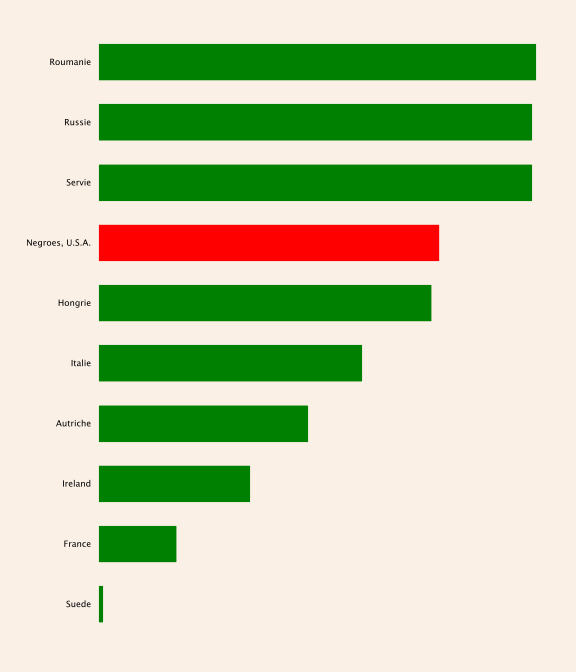

In [31]:
ssc install dubois
import delimited "https://raw.githubusercontent.com/HigherEdData/Du-Bois-STEM/refs/heads/main/data/d_literacy_country.csv", clear

gen illiteracy_neg = -illiteracy 
separate illiteracy,  by(country=="Negroes, U.S.A.")

graph hbar (asis) illiteracy0 illiteracy1, ///
    over(country, sort(illiteracy_neg) label(labsize(1.5)))  ///
    scheme(dubois) ///
    bar(1, color(green)) ///
    bar(2, color(red)) ///
    nofill ///
    legend(___) /// set legend to "off"
    ylabel("", _______) // set nogrid lines with empty ylabels

### 10. Add the Titles and Subtitles with Your Own Name

To add titles and subtitles to the graph, we use the **title** and **subtitle** specifications.

The title text needs to be enclosed in quotation marks. We use lines with empty quotation marks ```" "``` to and line spaces between title and subtitile lines.

Fill in the blank with your name in the title code below to show that the graph was recreated by you!

Finally, an extra ```graph export dubois_literacy.jpeg, replace``` line of code that is not part of the graph hbar command. This exports a copy of your graph to a jpeg file that you can submit for this assignment!

checking dubois consistency and verifying not already installed...
all files already exist and are up to date.
(encoding automatically selected: ISO-8859-1)
(2 vars, 10 obs)

Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
illiteracy0     float   %9.0g                 illiteracy, !(country=="Negroes,
                                                U.S.A.")
illiteracy1     float   %9.0g                 illiteracy, country=="Negroes,
                                                U.S.A."


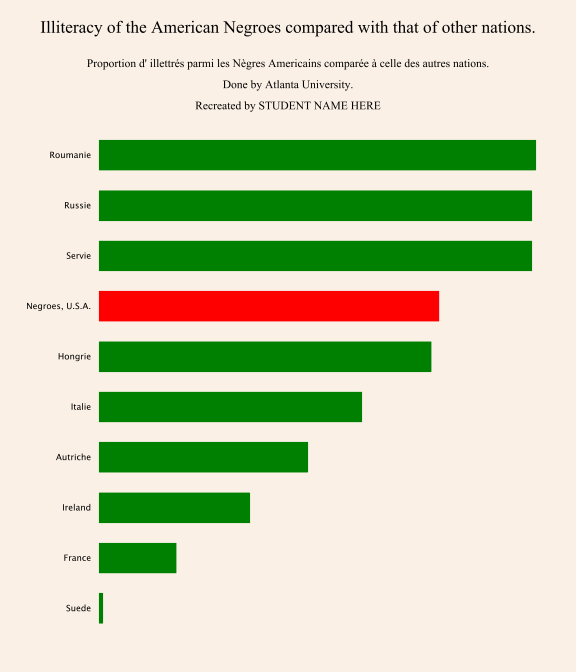

In [30]:
ssc install dubois
import delimited "https://raw.githubusercontent.com/HigherEdData/Du-Bois-STEM/refs/heads/main/data/d_literacy_country.csv", clear

gen illiteracy_neg = -illiteracy 
separate illiteracy,  by(country=="Negroes, U.S.A.")

graph hbar (asis) illiteracy0 illiteracy1, ///
    over(country, sort(illiteracy_neg) label(labsize(1.5))) nofill ///
    scheme(dubois) ///
    bar(1, color(green)) ///
    bar(2, color(red)) ///
    legend(off) /// 
    ylabel("", nogrid) /// 
    title("{stSerif}Illiteracy of the American Negroes compared with that of other nations." ///
            " ", size(3)) /// Add main title
    subtitle("{stSerif}Proportion d' illettrés parmi les Nègres Americains comparée à celle des autres nations." ///
            " " ///
            "{stSerif}Done by Atlanta University." ///
            " " ///
            "{stSerif}Recreated by _______________", /// add your name here to generate a graph with your name
             size(2)) // 

graph export dubois_literacy.jpeg, replace

### 11. Change the Data to Read in and Display College Degree Holding By Country

Now that you've written code to graph Du Bois' literacy data, you can use that same code to make bar graphs of other data in the same style.

To see how this works, fill in the blank below to import our **d_college_country.csv** dataset instead of the literacy dataset.

List will then display all of the country names and college attainment rates the data.

We obtained this data for the same countries that Du Bois graphed literacy in 1900.

We obtained the country level data from the most recent data reported by the OECD here: https://www.oecd.org/en/topics/sub-issues/education-attainment.html

We obtained the Black college attainment rate data for the U.S. from: https://www.luminafoundation.org/stronger-nation/report/#/progress/racial_equity

In [ ]:
ssc install dubois
// fill in the blank with d_college_country data file name below
import delimited "https://raw.githubusercontent.com/HigherEdData/Du-Bois-STEM/refs/heads/main/data/_______________.csv", clear

list

### 12. Edit the Code to Graph the College Attainment Data

After reading in the **d_college_country.csv** data, you can edit the graph code you used for the literacy code to graph the college data.

Fill in the blanks below to:

1. Change the bar variables you are graphing from literacy to the **college** variables.
2. Change the subtitle of the graph to be a translation of the title to the language of your choice. Du Bois translated his graph title to French for his 1900 Paris Exposition audience in France.
3. Add your own name for the **Adapted by** line.

In [ ]:
ssc install dubois
import delimited "https://raw.githubusercontent.com/HigherEdData/Du-Bois-STEM/refs/heads/main/data/d_college_country.csv", clear

gen college_neg = -college 
separate college,  by(country=="Negroes, U.S.A.")

** fill in the blanks below to graph the college variables
graph hbar (asis) __________0 __________1, ///
    over(country, sort(college_neg) label(labsize(1.5))) nofill ///
    scheme(dubois) ///
    bar(1, color(green)) ///
    bar(2, color(red)) ///
    legend(off) /// 
    ylabel("", nogrid) /// 
    title("{stSerif}College attainment by Black U.S. residents compared with that of other nations." ///
            " ", size(3)) /// 
    subtitle("{stSerif}Translation in language of your choice." /// add your translation here
            " " ///
            "{stSerif}Done by Atlanta University." ///
            " " ///
            "{stSerif}Recreated by _______________", /// add your name here to generate a graph with your name
             size(2)) // 

### 13. Improve Accessibility by Adding X Axis Grid Lines and Removing the Use of Red and Green

Some of Du Bois' graphing choices might not make sense for graphs you want to make. 

For example, Du Bois doesn't provide labels or grid lines to make it easy to understand what the range of college attainment rates are for the countries. **Delete the line of code below that removed the grid lines to restore them**

In addition, red and green bars are difficult to differentiate for those with colorblindness. **Edit the line of code that set the bar colors to green and red to change the colors to orange and blue which are colorblind accessible.**

Then run the code with the graph export command below to create a jpeg that you can submit for an assignment.

If you want to customize the chart further to add your own style twist, try a google search or chatGPT query. For a chatGPT query, you could copy and paste the code from below and ask, **how could I change this R ggplot code to change the font color to pink**

In [ ]:
ssc install dubois
import delimited "https://raw.githubusercontent.com/HigherEdData/Du-Bois-STEM/refs/heads/main/data/d_college_country.csv", clear

gen college_neg = -college 
separate college,  by(country=="Negroes, U.S.A.")

graph hbar (asis) college0 college1, ///
    over(country, sort(college_neg) label(labsize(1.5))) nofill ///
    scheme(dubois) ///
    bar(1, color(_____)) /// try blue
    bar(2, color(_____)) /// try orange
    legend(off) /// 
    ylabel("", nogrid) /// delete this line of code to restore grid lines
    title("{stSerif}College attainment by Black U.S. residents compared with that of other nations." ///
            " ", size(3)) /// 
    subtitle("{stSerif}Translation in language of your choice." /// add your translation here
            " " ///
            "{stSerif}Done by Atlanta University." ///
            " " ///
            "{stSerif}Recreated by _______________", /// remember to include your name here to generate a graph with your name
             size(2)) // 

graph export dubois_college.jpeg, replace